In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime
from google_news import fetch_news

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv.gz'
all_df_headlines = pd.read_csv(all_headlines_csv, compression='gzip')

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-04-12 02:05'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})


In [5]:
country_tlds = pd.read_csv('https://raw.githubusercontent.com/alext234/ccTLD/master/data/cc_tld.csv')

In [6]:
titles = set()
for _, tld in country_tlds.iterrows():
    gnews_url = 'https://news.google.com'+tld[0]
    try:
        titles.update(fetch_news(gnews_url))
        print(f'fetched {gnews_url}')
    except Exception as e:
        # probably some country TLD do not have a google news domain
        pass


fetched https://news.google.com.af
fetched https://news.google.com.ag
fetched https://news.google.com.ai
fetched https://news.google.com.ar
fetched https://news.google.com.au
fetched https://news.google.com.bd
fetched https://news.google.com.bh
fetched https://news.google.com.bn
fetched https://news.google.com.bo
fetched https://news.google.com.br
fetched https://news.google.com.by
fetched https://news.google.com.bz
fetched https://news.google.com.cn
fetched https://news.google.com.co
fetched https://news.google.com.cu
fetched https://news.google.com.cy
fetched https://news.google.com.do
fetched https://news.google.com.ec
fetched https://news.google.com.eg
fetched https://news.google.com.et
fetched https://news.google.com.fj
fetched https://news.google.com.ge
fetched https://news.google.com.gh
fetched https://news.google.com.gi
fetched https://news.google.com.gr
fetched https://news.google.com.gt
fetched https://news.google.com.hk
fetched https://news.google.com.iq
fetched https://news

In [7]:
assert len(titles)>0

In [8]:
df_latest = pd.DataFrame({'datetime':now, 'headline': list(titles)})

In [9]:
df_latest.head(10)

,datetime,headline
0,2020-04-12 02:05,Muere segundo médico por coronavirus en Colomb...
1,2020-04-12 02:05,Policía de Córdoba inicia investigación por ma...
2,2020-04-12 02:05,Dudamel y la verdad con la selección salen a l...
3,2020-04-12 02:05,Το κινητό θα σε ειδοποιεί αν ήρθες σε επαφή με...
4,2020-04-12 02:05,OMS publica guía para considerar antes de leva...
5,2020-04-12 02:05,Barcelona civil war explained: Why Camp Nou is...
6,2020-04-12 02:05,COVID-19: La parlamentaria Leslye Lazo y su es...
7,2020-04-12 02:05,За добу – 308 випадків: в Україні вже 2511 інф...
8,2020-04-12 02:05,COVID-19: LCB partners GHS to disinfect hotels...
9,2020-04-12 02:05,"ΗΟΝΟR Life, Stay at Home! - Προσφορές, δώρα κα..."


In [10]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [11]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [12]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False,  compression='gzip')

In [13]:
def is_reference_corona(s):
    return (
        ('coronavirus' in s)
        or ('covid-19' in s)
        or ('corona' in s)
        or ('ncov' in s)
    )
        
    
# is_virus is 1 if there is reference to coronavirus
    
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if is_reference_corona(v.lower()) else 0)
)

In [14]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [15]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
980,Four-year-old cancer patient Archie 'out the o...
995,Luhut Terbitkan Pengendalian Transportasi Kala...
1025,"Darurat Corona, Begini Sebaran COVID-19 di Pro..."
1029,"Estados Unidos, el país con más muertes por co..."
1047,How China's army of food delivery drivers help...


In [16]:
# output json stat 
import json
data_stats_json = 'data/data_stats.json'
data_stats = {'schemaVersion': 1, 
              'label': f'Last update {now}', 
              'message': f'Total number of headlines: {all_df_headlines.shape[0]}'}
with open(data_stats_json, 'w') as fo:
    fo.write(json.dumps(data_stats))
data_stats

{'schemaVersion': 1,
 'label': 'Last update 2020-04-12 02:05',
 'message': 'Total number of headlines: 325472'}

In [17]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [18]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-04-12 02:05:00,2020-04-12 02:05,美国死亡破2万，成全球最多！特朗普：这是我们努力的结果 - 京报网,0,79367
2020-04-12 02:05:00,2020-04-12 02:05,"Caixa já registrou 32,2 milhões de cadastros p...",0,79367
2020-04-12 02:05:00,2020-04-12 02:05,How China's army of food delivery drivers help...,1,79368


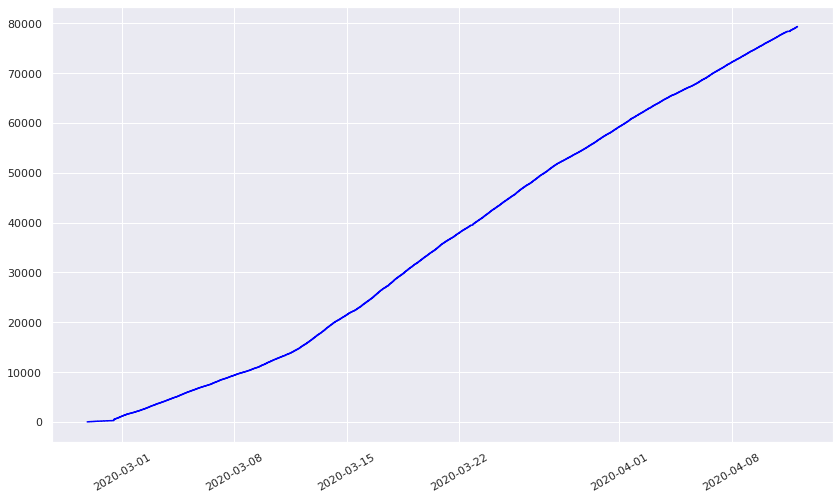

In [19]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [20]:
fig.savefig(png_file)
